In [598]:

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('font', **{
'family': 'DejaVu Sans',
'weight': 'normal'
})

In [590]:
os.chdir('/home/domain/data/kirill/AB/XOP/md/a17/R/')
with open('mindist.xvg') as f:
    lines = f.readlines()
os.chdir('/home/domain/data/kirill/AB/XOP/md/a17/S/')
with open('mindist.xvg') as f:
    lines += f.readlines()[23:]
lines = lines[23:]    
d = []
for l in lines:
    d.append(float(l.split()[-1]))

IOError: [Errno 2] No such file or directory: 'mindist.xvg'

# plot 1d fes

In [628]:
os.chdir('/home/domain/data/kirill/AB/XOP/md/a5/S/')
with open('fes1d0.dat') as f:
    lines = f.readlines()[5:]
x = []
y = []
for l in lines:
    x.append(float(l.split()[0]))
    y.append(float(l.split()[-1]))
y = np.array(y)

In [629]:
import numpy as np
from scipy.signal import argrelextrema
# for local minima
argrelextrema(y, np.less)


(array([18, 37]),)

In [639]:
Wref = y[18]# - y[37]
Scyl = np.pi * 0.15**2
C0 = 1e27 / 6.02e23
pmf = 0
for Wi,d in zip(y,x):
    if d > -2.5:
        pmf += np.exp(-(Wi - Wref)/ 2.5)
Kd = 1/(pmf * Scyl * C0)
print Kd

5.67528276681e-11


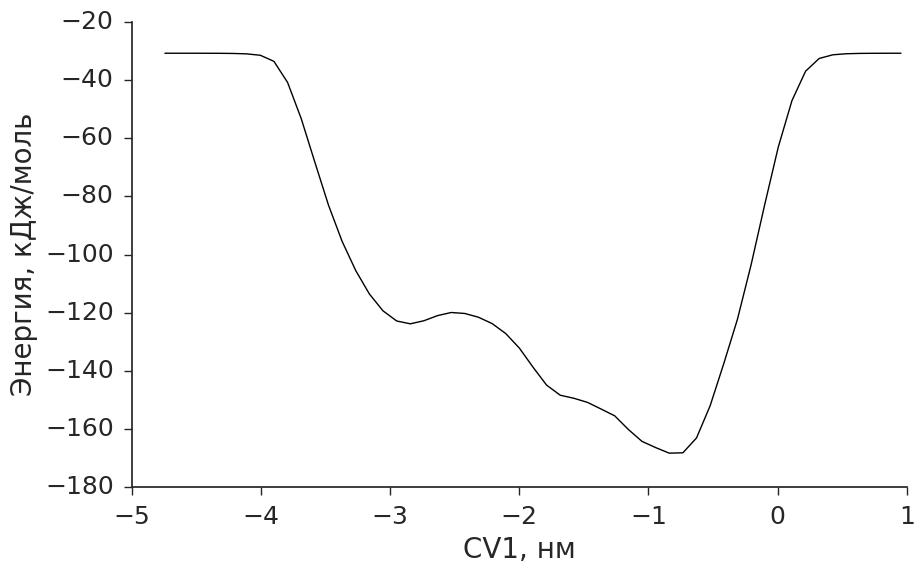

In [604]:
fig, ax = plt.subplots(figsize=(10,6))
sns.despine()
plt.ylabel(u"Энергия, кДж/моль", fontsize=20)
plt.xlabel(u"CV1, нм", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.plot(x,y, lw = 1, color = "black")

In [333]:
# estimate D-L35 activation

In [334]:
hs = np.histogram(d)
hs[0][1]/ float(sum(hs[0]))

0.045569620253164557

In [337]:
np.mean(d)

0.84289775120586286

In [ ]:
# 90 / total


(0.2, 0.4)

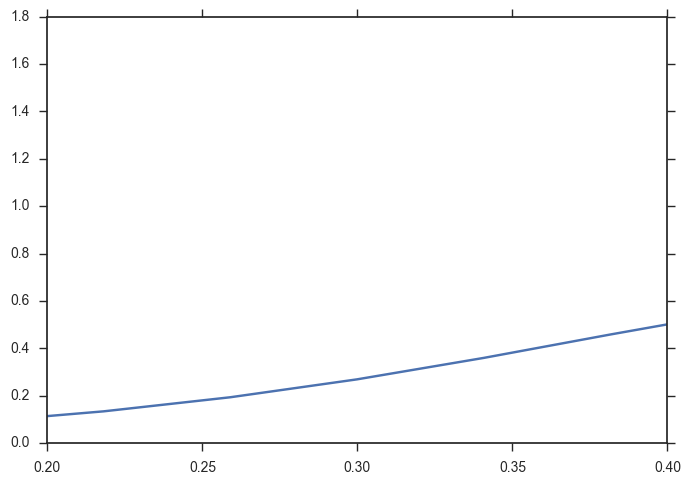

In [321]:
sns.kdeplot(np.array(d), bw=0.5)
plt.xlim(0.2,0.4)

In [567]:
os.chdir('/home/domain/data/kirill/AB/XOP/qmmm/prfs/qmmm_complexes_all/all_fess/')

In [568]:
a5Rmin_ens = []
a5Smin_ens = []
a17Rmin_ens = []
a17Smin_ens = []
for fl in os.listdir("/home/domain/data/kirill/AB/XOP/qmmm/prfs/qmmm_complexes_all/all_fess/"):  
    min_en = 99999
    max_en = -99999
    with open(fl) as f:
        lines = f.readlines()
        
    for l in lines:
        if "#" in l: continue
        en = float(l.split()[1])
        if min_en > en:
            min_en = en
        if max_en < en:
            max_en = en  
    print max_en
    if "a5R" in fl:
        a5Rmin_ens.append(-min_en)
    if "a5S" in fl:
        a5Smin_ens.append(-min_en)
    if "a17R" in fl:
        a17Rmin_ens.append(-min_en)
    if "a17S" in fl:
        a17Smin_ens.append(-min_en)

-0.000965233
-0.001706717
-0.001465079
-0.002325444
-0.004472561
-0.001966615
-0.00443796
-0.001291312
-0.000964607
-0.00323934
-0.001897684
-0.002401344
-0.011212253
-0.0
-0.0
-0.00160008
-0.0
-0.04764706
-0.0
-0.001302394
-0.0
-0.001417307
-0.015803661
-0.001294385
-0.001375249
-0.002417635
-0.001477449
-0.002771843
-0.001761464
-0.002432185
-0.001305748
-0.002135045
-0.002334965
-0.001420592
-0.001552251
-0.001944571
-0.0
-0.0
-0.003302541
-0.0
-0.0
-0.0
-0.003810843
-0.001788122
-0.00096542
-0.001291705
-0.001806076
-0.011310751
-0.0
-0.0
-0.014729246
-0.001736925
-0.001452562
-0.000965707
-0.002532832
-0.002024361
-0.001730243
-0.001406365
-0.002100503
-0.003185415
-0.00096531
-0.00156746
-0.002626106
-0.002205035
-0.001667948
-0.0
-0.002245022
-0.007479611
-0.0
-0.037004549
-0.000964499
-0.002668316
-0.000965262
-0.000965368
-0.001344315
-0.000965296
-0.002223989
-0.000965211
-0.000965237
-0.002380374
-0.000965236
-0.002917569
-0.0
-0.00236904
-0.004341188
-0.0
-0.000965841
-0.00

In [198]:
from  scipy.stats import ttest_ind

In [214]:
np.random.random_sample(10)

array([ 0.45488164,  0.82311118,  0.24537559,  0.2627339 ,  0.76566312,
        0.57241887,  0.28478953,  0.96181232,  0.03254554,  0.45597345])

In [252]:
from scipy.stats import mannwhitneyu

In [258]:
mannwhitneyu(a17Rmin_ens,a17Smin_ens)

MannwhitneyuResult(statistic=4881.0, pvalue=0.16834823048553943)

In [259]:
ttest_ind(np.random.random_sample(4),np.random.random_sample(4))

Ttest_indResult(statistic=-0.46105910493966795, pvalue=0.66099623469026481)

In [260]:
ttest_ind(a=a5Rmin_ens,b=a5Smin_ens, equal_var=False)

Ttest_indResult(statistic=0.60617232246341779, pvalue=0.5454173303562917)

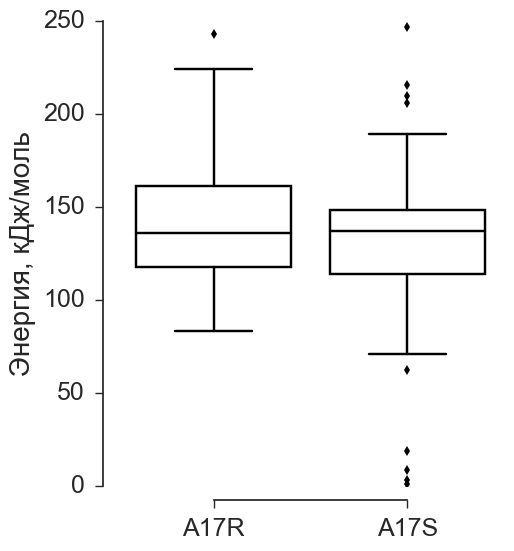

In [570]:
sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(5,6))
plt.ylabel(u"Энергия, кДж/моль", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
#plt.title(u"Распределение энергий депротонированя",fontweight="bold")
g=sns.boxplot(data=[a17Rmin_ens,a17Smin_ens], color="1")#,a5Rmin_ens,a5Smin_ens])
_=ax.set_xticklabels(["A17R","A17S"])
plt.xticks
col = "black"
for i,artist in enumerate(g.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = g.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

sns.despine(offset=10, trim=True)

In [554]:
print np.mean(a5Rmin_ens)
print np.mean(a5Smin_ens)

142.351455072
146.151449862


#### mutant qmmm energies

In [380]:
import re

In [548]:
result_dic = {}

os.chdir("/home/domain/data/kirill/AB/XOP/qmmm/mutants_after_docking/R/reacted_fess/")
for fl in os.listdir("/home/domain/data/kirill/AB/XOP/qmmm/mutants_after_docking/R/reacted_fess/"): 
    if "40_10" in fl or "8_34" in fl: # ignore bad tings R
#     if "40_10" in fl or\
#         "1_12" in fl or\
#         "68_41" in fl or\
#         "35_78" in fl or\
#         "17_86" in fl: # ignore bad tings S
         continue
    min_en = 99999
    with open(fl) as f:
        lines = f.readlines()
        
    for l in lines:
        if "#" in l: continue
        en = float(l.split()[1])
        if min_en > en:
            min_en = en
    
    key = re.findall("rel_(.*)_fixed",fl)[0]
    if not result_dic.has_key(key): 
        result_dic.update({key:[-min_en]})
    else:
        result_dic[key].append(-min_en)

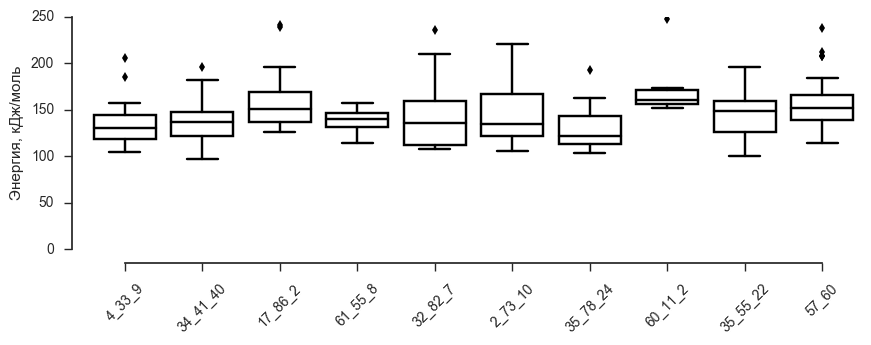

In [550]:
l = result_dic.items()
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10,3))
plt.ylabel(u"Энергия, кДж/моль")
names, boxes = result_dic.keys(),result_dic.values()
names = [re.sub("[a-z]", "", n).strip("_").replace("__","_") for n in names]
#plt.title(u"Распределение энергий депротонирования продуктивных комплексов с R-энантиомером",fontweight="bold")
g=sns.boxplot(data=boxes, color="1")
_=ax.set_xticklabels(names)
plt.ylim(0,250)
col = "black"
for i,artist in enumerate(g.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = g.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

sns.despine(offset=10, trim=True)
for item in g.get_xticklabels():
    item.set_rotation(45)

In [615]:
os.chdir('/home/domain/data/kirill/AB/XOP/md/a5/R/')

In [618]:
dx = []
ang = []
f = open("COLVARa5R.ready")

for line in f.readlines():
    if "#" in line: continue
    dx.append(float(line.split()[3]))
    ang.append(float(line.split()[4]))
f.close()
dxx = zip(np.arange(0,len(dx)/1000.0,0.001),dx)
angx = zip(np.arange(0,len(ang)/1000.0,0.001),ang)

In [619]:
d_sub = [x[:2] for x in zip(np.arange(0,len(dx)/10.0,0.001),dx,ang) if x[1]< 1 and x[1] > 0.8 and x[2] > 2.44]

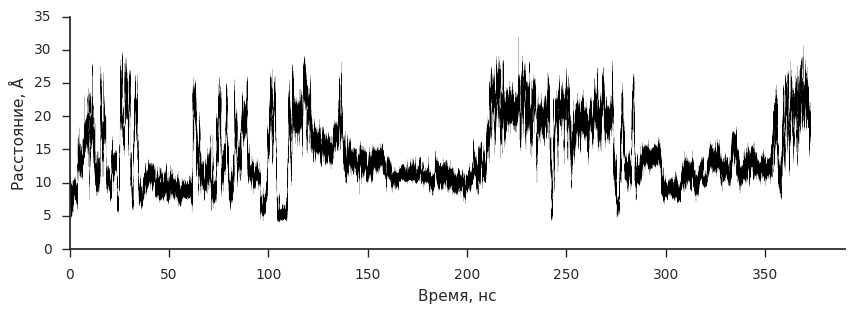

In [620]:
fig, ax = plt.subplots(figsize=(10,3))
plt.plot(np.arange(0,len(dx)/1000.0,0.001),[d*10 for d in dx], color="black", linewidth=.10) # original data
#plt.plot(*zip(*dxx), color="black", markersize= 5, alpha=0.1) # original data
#plt.scatter(*zip(*d_sub), color="red", s=1) # original data
plt.xlim(0,390)
plt.ylim(0,35)
plt.xlabel(u"Время, нс")
plt.ylabel(u"Расстояние, \u00c5")
sns.despine()
#plt.title(u"Зависимость расстояния между R ХОР и А5 от времени")

In [514]:
os.chdir('/home/domain/data/kirill/AB/XOP/prepare_md/mutants/stability_test/61_55/')
time = []
rmsd_good = []
rmsd_bad = []
rmsd_ugly = []
with open("rmsd.xvg") as f:
    lines = f.readlines()
    
for line in lines:
    if "#" in line or "@" in line: continue
    time.append(float(line.split()[0])/1000)
    rmsd_bad.append(float(line.split()[1]))
os.chdir('/home/domain/data/kirill/AB/XOP/md/mutant_cone/12_3rel57_60/')
with open("rmsdR.xvg") as f:
    lines = f.readlines()
    if len(lines) < len(time):
        time = [a/10.0 for a in range(0,len(lines)-17)]
for line in lines:
    if "#" in line or "@" in line: continue
    rmsd_good.append(float(line.split()[1]))
#os.chdir('/home/domain/data/kirill/AB/XOP/prepare_md/mutants/stability_test/2_73_val/')
with open("rmsdS.xvg") as f:
    lines = f.readlines()
    if len(lines) < len(time):
        time = [a/10.0 for a in range(0,len(lines)-17)]
for line in lines:
    if "#" in line or "@" in line: continue
    rmsd_ugly.append(float(line.split()[1]))

#dxx = zip(np.arange(0,len(dx)/1000.0,0.001),dx)
#angx = zip(np.arange(0,len(ang)/1000.0,0.001),ang)

In [515]:
len(rmsd_good)

3965

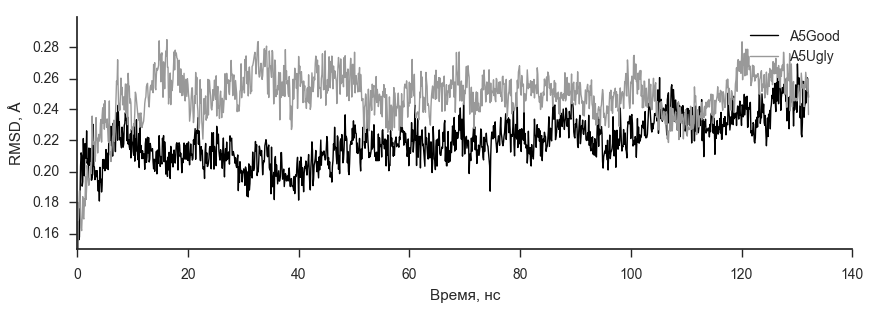

In [517]:
fig, ax = plt.subplots(figsize=(10,3),)
sns.set_style("ticks")
sns.despine()


a=plt.plot(time,rmsd_good[:len(time)], color="black", linewidth=1, label= "A5Good") # original data
#b=plt.plot(time,rmsd_bad[:len(time)], color=(0.25,0.25,0.25), linewidth=1, label= "A5Bad") # original data
c=plt.plot(time,rmsd_ugly[:len(time)], color=(0.6,0.6,0.6), linewidth=1, label= "A5Ugly") # original data
plt.legend(loc = "upper right")
#plt.plot(*zip(*dxx), color="black", markersize= 5, alpha=0.1) # original data
#plt.scatter(*zip(*d_sub), color="red", s=1) # original data
#plt.xlim(0,100)
plt.ylim(0.15,0.3)
plt.xlabel(u"Время, нс")
plt.ylabel(u"RMSD, \u00c5")
plt.show()
#plt.title(u"RMSD атомов остова мутанта A5bad", fontweight="bold")

# clustering

In [ ]:
# k-means 100 clusters of transformed data

In [13]:
clusterer = msmbuilder.cluster.MiniBatchKMeans(n_clusters=100, random_state=42)
clustered_trajs = clusterer.fit_transform(tr_dat)

print(tr_dat[0].shape)
print(clustered_trajs[0].shape)

(599999, 1)
(599999,)


In [ ]:
# build a markov model to get the states with bigges populations? (like you can't do it by len of clusterer and sorting -_-)

In [66]:
msm = ContinuousTimeMSM(lag_time=2, n_timescales=20)
msm.fit(clustered_trajs)

ContinuousTimeMSM(ergodic_cutoff=1, guess='log', lag_time=2, n_timescales=20,
         sliding_window=True, verbose=False)

In [ ]:
# how many states should we consider?
# lets check how much time we can get from selecting the least number of states
# we use the sums of all highest populated states (a CDF?)

[0, 0.028213498339926282, 0.053877805624749892, 0.078273180252163677, 0.098740611435967351, 0.11919509894794421, 0.1394059851390948, 0.15934322577173063, 0.17772695175368472, 0.19605146912395641, 0.21418483039940395, 0.23201782631135859, 0.24914948014990107, 0.26574815921878758, 0.28216852464876296, 0.29825559630050796, 0.31389945644087458, 0.3287431940466114, 0.34357639323092548, 0.35831013697719638, 0.37303869902919917, 0.38763865547362125, 0.40160118461165306, 0.41555519398113627, 0.42938056810662617, 0.44246496187345186, 0.45539013611150608, 0.46817629528448973, 0.48047875495831138, 0.49272044433403206, 0.5049500967228826, 0.51711805280209211, 0.52871061421710908, 0.53984375726763945, 0.55084407674061253, 0.5617793756192464, 0.57241836594487283, 0.58301378776034996, 0.59334192363655114, 0.60357110632974564, 0.61377552344599728, 0.62389526503872728, 0.63390694986545038, 0.64376876859701981, 0.65350047032546221, 0.66321332500474783, 0.67289651278389506, 0.68237275588611279, 0.6916998

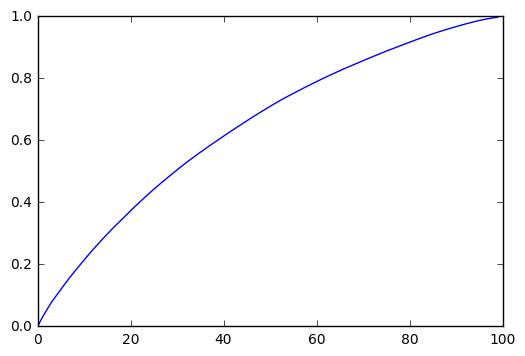

In [142]:
pop_sum = [sum(sorted(msm.populations_,reverse=True)[0:x]) for x in range(len(msm.populations_))]
plt.plot(pop_sum)
print pop_sum

In [143]:
# the plot doesn't look too good, but at least its convex :D
# I chooose to consider the states that describe 25% of the traj, so the cutoof is 14 states

In [246]:
good = sorted([x for x in zip(range(100),msm.populations_)],reverse=True,key = lambda(x): x[1])[0:13]

In [247]:
centers = [x[0] for x in good]
centers

[31, 28, 10, 6, 50, 45, 17, 18, 38, 29, 70, 69, 32]

In [248]:
# now get the states from initial traj

In [249]:
states = [(x[2],x[0]) for x in zip(dx,clustered_trajs[0],range(len(dx))) if x[1] in centers]
len(ind)/float(len(clustered_trajs[0])) # confirms we got ~20% of all frames

0.21444702407837346

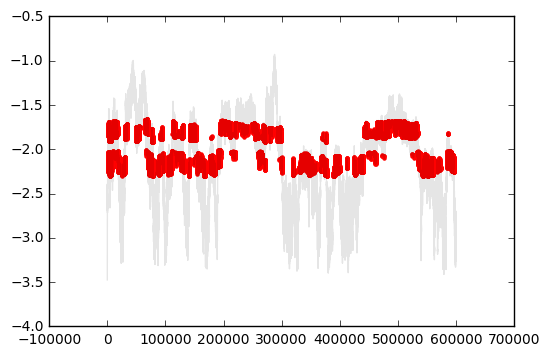

In [250]:
plt.plot(dx,color='black', ls='-', alpha=0.1)
plt.scatter(y=np.array(states).transpose()[1],x= np.array(states).transpose()[0], marker='.', color='r')


In [ ]:
# write timestamps to file

In [285]:
series = [[0.5 * x, 0] for x in range(len(dx))]
for x in states:
    series[x[0]] = [series[x[0]][0], 10]
    


In [286]:
series = ['\t'.join([str(a) for a in x])+"\n" for x in series]

In [287]:
series[:600]

['0.0\t0\n',
 '0.5\t0\n',
 '1.0\t0\n',
 '1.5\t0\n',
 '2.0\t0\n',
 '2.5\t0\n',
 '3.0\t0\n',
 '3.5\t0\n',
 '4.0\t0\n',
 '4.5\t0\n',
 '5.0\t0\n',
 '5.5\t0\n',
 '6.0\t0\n',
 '6.5\t0\n',
 '7.0\t0\n',
 '7.5\t0\n',
 '8.0\t0\n',
 '8.5\t0\n',
 '9.0\t0\n',
 '9.5\t0\n',
 '10.0\t0\n',
 '10.5\t0\n',
 '11.0\t0\n',
 '11.5\t0\n',
 '12.0\t0\n',
 '12.5\t0\n',
 '13.0\t0\n',
 '13.5\t0\n',
 '14.0\t0\n',
 '14.5\t0\n',
 '15.0\t0\n',
 '15.5\t0\n',
 '16.0\t0\n',
 '16.5\t0\n',
 '17.0\t0\n',
 '17.5\t0\n',
 '18.0\t0\n',
 '18.5\t0\n',
 '19.0\t0\n',
 '19.5\t0\n',
 '20.0\t0\n',
 '20.5\t0\n',
 '21.0\t0\n',
 '21.5\t0\n',
 '22.0\t0\n',
 '22.5\t0\n',
 '23.0\t0\n',
 '23.5\t0\n',
 '24.0\t0\n',
 '24.5\t0\n',
 '25.0\t0\n',
 '25.5\t0\n',
 '26.0\t0\n',
 '26.5\t0\n',
 '27.0\t0\n',
 '27.5\t0\n',
 '28.0\t0\n',
 '28.5\t0\n',
 '29.0\t0\n',
 '29.5\t0\n',
 '30.0\t0\n',
 '30.5\t0\n',
 '31.0\t0\n',
 '31.5\t0\n',
 '32.0\t0\n',
 '32.5\t0\n',
 '33.0\t0\n',
 '33.5\t0\n',
 '34.0\t0\n',
 '34.5\t0\n',
 '35.0\t0\n',
 '35.5\t0\n',
 '36.0\t0\n'

In [288]:

f = open("states.xvg", "w")
f.writelines(series)
f.close()

In [282]:
f.close()

In [102]:
msm.transform(clustered_trajs) == clustered_trajs[0]

array([[ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [65]:
msm_traj= msm.fit_transform(clustered_trajs)

NameError: name 'msm' is not defined

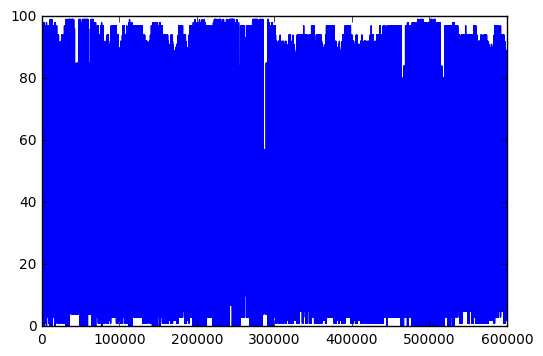

In [238]:
plt.plot(msm_traj[0])
plt.plot(msm.)

# clustering example

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


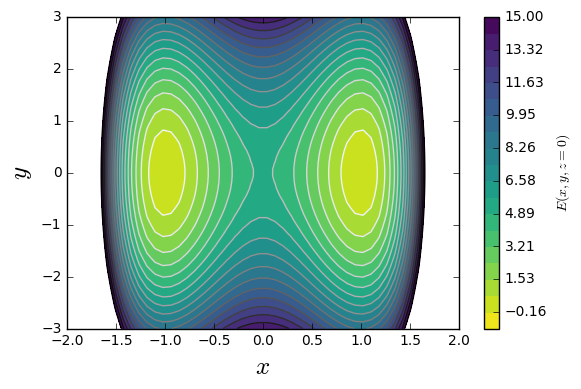

In [10]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

xx, yy = np.meshgrid(np.linspace(-2,2), np.linspace(-3,3))
zz = 0 # We can only visualize so many dimensions
ww = 5 * (xx-1)**2 * (xx+1)**2 + yy**2 + zz**2
c = plt.contourf(xx, yy, ww, np.linspace(-1, 15, 20), cmap='viridis_r')
plt.contour(xx, yy, ww, np.linspace(-1, 15, 20), cmap='Greys')
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$y$', fontsize=18)
plt.colorbar(c, label='$E(x, y, z=0)$')
plt.tight_layout()

In [13]:
import sys
sys.path.append('/home/domain/kirill/progs/lib/python2.7/site-packages')
import simtk.openmm as mm
def propagate(n_steps=10000):
    system = mm.System()
    system.addParticle(1)
    force = mm.CustomExternalForce('5*(x-1)^2*(x+1)^2 + y^2 + z^2')
    force.addParticle(0, [])
    system.addForce(force)
    integrator = mm.LangevinIntegrator(500, 1, 0.02)
    context = mm.Context(system, integrator)
    context.setPositions([[0, 0, 0]])
    context.setVelocitiesToTemperature(500)
    x = np.zeros((n_steps, 3))
    for i in range(n_steps):
        x[i] = (context.getState(getPositions=True)
                .getPositions(asNumpy=True)
                ._value)
        integrator.step(1)
    return x

ImportError: /home/domain/kirill/progs/lib/python2.7/site-packages/simtk/openmm/_openmm.so: undefined symbol: PyUnicodeUCS2_AsUTF8String

In [8]:
import simtk

In [2]:
32*28 / 12

74